<a href="https://colab.research.google.com/github/jhuang2003/Seattle-Weather/blob/main/seattle_weather_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np

df = pd.DataFrame({"a": np.ones((100,))})

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

##Load Seattle and New York Datasets##

In [92]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/seattle_rain.csv')
df_ny = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/ny_rain.csv')

**Source**

---
This dataset contains the daily measured precipitation in Seattle and New York for 2 years starting from January 1, 2020. This data is from the National Centers for Enviormental Information [NOAA's](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND)online search tool.



##Inspect contents of each dataset##

---
The purpose of this section is to get a sense of the data available in this dataset. This include the size of the datasets, names of each column, the datatype of the data, and checks for outliers.


**Seattle**

---



In [93]:
df_seattle.shape

(7003, 13)

In [94]:
df_seattle.head(5) #Shows the first 5 rows

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,82.9,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
1,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,135.0,2020-01-01,NaN,NaN,0.23,NaN,NaN,NaN,NaN
2,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,48.2,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,74.1,2020-01-01,NaN,NaN,0.13,NaN,NaN,NaN,NaN
4,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,112.5,2020-01-01,NaN,NaN,0.22,NaN,NaN,NaN,NaN


In [95]:
df_seattle.describe() #Checks for outliers

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,7003.000000,7003.000000,7003.000000,143.000000,143.000000,6718.000000,3006.000000,1331.000000,0.0,0.0
mean,47.593303,-122.322535,102.045666,5.776224,0.892098,0.132364,0.050000,0.172727,NaN,NaN
std,0.091807,0.023108,31.391744,6.723325,1.585583,0.270202,0.466821,0.960576,NaN,NaN
min,47.444670,-122.382541,37.200000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,47.543999,-122.314420,74.100000,2.000000,0.080000,0.000000,0.000000,0.000000,NaN,NaN
50%,47.611700,-122.312907,112.500000,4.000000,0.420000,0.010000,0.000000,0.000000,NaN,NaN
75%,47.696532,-122.308500,121.300000,6.000000,1.000000,0.140000,0.000000,0.000000,NaN,NaN
max,47.702387,-122.303810,135.600000,53.000000,11.400000,3.010000,10.000000,11.000000,NaN,NaN


In [96]:
df_seattle.info() #Names of columns and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    7003 non-null   object 
 1   NAME       7003 non-null   object 
 2   LATITUDE   7003 non-null   float64
 3   LONGITUDE  7003 non-null   float64
 4   ELEVATION  7003 non-null   float64
 5   DATE       7003 non-null   object 
 6   DAPR       143 non-null    float64
 7   MDPR       143 non-null    float64
 8   PRCP       6718 non-null   float64
 9   SNOW       3006 non-null   float64
 10  SNWD       1331 non-null   float64
 11  DASF       0 non-null      float64
 12  MDSF       0 non-null      float64
dtypes: float64(10), object(3)
memory usage: 711.4+ KB


**New York**

---



In [97]:
df_ny.shape

(17465, 13)

In [98]:
df_ny.head() #Shows the first 5 rows

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,42.7,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
1,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,117.3,2020-01-01,NaN,NaN,0.06,0.0,0.0,NaN,NaN
2,US1NYNS0034,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,4.3,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
3,USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.734430,-73.416370,22.8,2020-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,43.3,2020-01-01,NaN,NaN,0.00,0.0,NaN,NaN,NaN


In [99]:
df_ny.describe() #Checks for outliers

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,17465.000000,17465.000000,17465.000000,155.000000,151.000000,17275.000000,11508.000000,6318.000000,0.0,0.0
mean,40.826103,-73.697762,48.792551,5.187097,0.835695,0.136644,0.043483,0.255033,NaN,NaN
std,0.189215,0.210564,46.087915,5.581494,1.253480,0.396871,0.520562,1.465410,NaN,NaN
min,40.615654,-74.145561,2.100000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,40.668899,-73.823290,4.300000,2.000000,0.070000,0.000000,0.000000,0.000000,NaN,NaN
50%,40.758947,-73.710999,42.700000,3.000000,0.390000,0.000000,0.000000,0.000000,NaN,NaN
75%,41.091681,-73.505371,91.700000,5.000000,1.010000,0.060000,0.000000,0.000000,NaN,NaN
max,41.150120,-73.358045,175.000000,42.000000,7.000000,9.450000,16.000000,18.000000,NaN,NaN


In [100]:
df_ny.info() #Name of columns and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17465 entries, 0 to 17464
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    17465 non-null  object 
 1   NAME       17465 non-null  object 
 2   LATITUDE   17465 non-null  float64
 3   LONGITUDE  17465 non-null  float64
 4   ELEVATION  17465 non-null  float64
 5   DATE       17465 non-null  object 
 6   DAPR       155 non-null    float64
 7   MDPR       151 non-null    float64
 8   PRCP       17275 non-null  float64
 9   SNOW       11508 non-null  float64
 10  SNWD       6318 non-null   float64
 11  DASF       0 non-null      float64
 12  MDSF       0 non-null      float64
dtypes: float64(10), object(3)
memory usage: 1.7+ MB


In [101]:
df_seattle.columns.unique() == df_seattle.columns #Checks that the column names are the same in both tables

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

After the initial analysis of the dataset we found that the New York dataset is 3 times as large as the Seattle one, which would skew our results. However, the datasets have the same number of columns, but some of the datatypes are not as expected.

##Converting data types to the correct types##

---
Since we found that one of the datatypes in the columns were not as expected, there arose a need to convert  them to an appropriate format in both datasets.


In [102]:
df_seattle["DATE"] = pd.to_datetime(df_seattle["DATE"])
df_ny["DATE"] = pd.to_datetime(df_ny["DATE"])

In [103]:
df_seattle.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
MDPR                float64
PRCP                float64
SNOW                float64
SNWD                float64
DASF                float64
MDSF                float64
dtype: object

In [104]:
df_ny.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
MDPR                float64
PRCP                float64
SNOW                float64
SNWD                float64
DASF                float64
MDSF                float64
dtype: object

After completing this we were able to successfully convert the datatypes for the date columns to datetime datatype.

##Remove Unnecessary parts of the data##

---

This section will get rid of data we don't need which will improve run time and visually declutter the dataset.

In [105]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    7003 non-null   object        
 1   NAME       7003 non-null   object        
 2   LATITUDE   7003 non-null   float64       
 3   LONGITUDE  7003 non-null   float64       
 4   ELEVATION  7003 non-null   float64       
 5   DATE       7003 non-null   datetime64[ns]
 6   DAPR       143 non-null    float64       
 7   MDPR       143 non-null    float64       
 8   PRCP       6718 non-null   float64       
 9   SNOW       3006 non-null   float64       
 10  SNWD       1331 non-null   float64       
 11  DASF       0 non-null      float64       
 12  MDSF       0 non-null      float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 711.4+ KB


In [106]:
#Drops the unnecessary columns
bad_cols = ["ELEVATION", "DAPR", "MDPR", "SNOW", "SNWD", "DASF", "MDSF"]
df_seattle = df_seattle.drop(columns=bad_cols)
df_ny = df_ny.drop(columns=bad_cols)

In [107]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    7003 non-null   object        
 1   NAME       7003 non-null   object        
 2   LATITUDE   7003 non-null   float64       
 3   LONGITUDE  7003 non-null   float64       
 4   DATE       7003 non-null   datetime64[ns]
 5   PRCP       6718 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 328.4+ KB


In [108]:
df_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17465 entries, 0 to 17464
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    17465 non-null  object        
 1   NAME       17465 non-null  object        
 2   LATITUDE   17465 non-null  float64       
 3   LONGITUDE  17465 non-null  float64       
 4   DATE       17465 non-null  datetime64[ns]
 5   PRCP       17275 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 818.8+ KB


It was found that ELEVATION, DAPR, MDPR, SNOW, SNWD, DSF, MDSF is not relevant to answering the question if it rainsmore in Seattle or New York.

##Dealing with missing values##

---
Since this dataset has some missing values, we had to decide how to fill in these gaps in the data.

In [109]:
#Takes the average precipitation for each day
df_seattle_avg = df_seattle.groupby(by="DATE", as_index=False)["PRCP"].mean()
df_ny_avg = df_ny.groupby(by="DATE", as_index=False)["PRCP"].mean()

In [110]:
df_seattle_avg.head(5)

,DATE,PRCP
0,2020-01-01,0.162500
1,2020-01-02,0.181250
2,2020-01-03,0.267500
3,2020-01-04,0.172000
4,2020-01-05,0.168571


It was found that the best way to hand this would be to take the average precipitation for each day.

##Join Seattle and New York Data Frames##

---
We then want to combine the datasets into 1 data table.


In [111]:
df_ny_avg = df_ny_avg.drop_duplicates(subset="DATE")
df_seattle_avg = df_seattle_avg.drop_duplicates(subset="DATE")

In [112]:
df = df_ny_avg.merge(df_seattle_avg, on="DATE", how="left")

In [113]:
df.tail()

,DATE,PRCP_x,PRCP_y
1456,2023-12-27,0.051538,0.063333
1457,2023-12-28,1.845000,0.240000
1458,2023-12-29,0.103571,0.055000
1459,2023-12-30,0.006429,0.042500
1460,2023-12-31,0.000714,0.050000


We did this using a left join

##Tidy Data##

---
Since this resulted in three columns 1 for date, 1 for seattle, and 1 for seattle. We then had to go throuhg a process called tidying.


In [114]:
df_tidy = pd.melt(df, id_vars="DATE", value_vars="PRCP", var_name="city")
df_tidy

,DATE,city,value
0,2020-01-01,PRCP_y,0.162500
1,2020-01-02,PRCP_y,0.181250
2,2020-01-03,PRCP_y,0.267500
3,2020-01-04,PRCP_y,0.172000
4,2020-01-05,PRCP_y,0.168571
...,...,...,...
1456,2023-12-27,PRCP_y,0.063333
1457,2023-12-28,PRCP_y,0.240000
1458,2023-12-29,PRCP_y,0.055000
1459,2023-12-30,PRCP_y,0.042500


In [115]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')

In [116]:
df.head()

,DATE,CITY,PRCP
0,2020-01-01,PRCP_x,0.013333
1,2020-01-02,PRCP_x,0.000000
2,2020-01-03,PRCP_x,0.134444
3,2020-01-04,PRCP_x,0.200000
4,2020-01-05,PRCP_x,0.040000


This would result in a data table with 1 column for date, 1 for city, and 1 for precipitation. Allowing us to be able to create plots for this dataset.

##Rename Columns##

---
In order to follow best coding practices we have to rename some columns.


In [117]:
df.loc[df['CITY']=='PRCP_x', 'CITY'] = 'NYC'
df.loc[df['CITY']=='PRCP_y', 'CITY'] = 'SEA'

In [118]:
df.head()

,DATE,CITY,PRCP
0,2020-01-01,NYC,0.013333
1,2020-01-02,NYC,0.000000
2,2020-01-03,NYC,0.134444
3,2020-01-04,NYC,0.200000
4,2020-01-05,NYC,0.040000


In [119]:
df.tail()

,DATE,CITY,PRCP
2917,2023-12-27,SEA,0.063333
2918,2023-12-28,SEA,0.240000
2919,2023-12-29,SEA,0.055000
2920,2023-12-30,SEA,0.042500
2921,2023-12-31,SEA,0.050000


In [120]:
mapping_dict = {'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'}
df = df.rename(columns=mapping_dict)

In order to follow snake_case we capitalized and abbreviated New York and Seattle. In addition, we made the other variable names lowercased.

##Identify Missing Values##

---

We used df.info () and msno.matrix(df) to identify any nulls or gaps in our data.

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2922 non-null   datetime64[ns]
 1   city           2922 non-null   object        
 2   precipitation  2921 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 68.6+ KB


<Axes: >

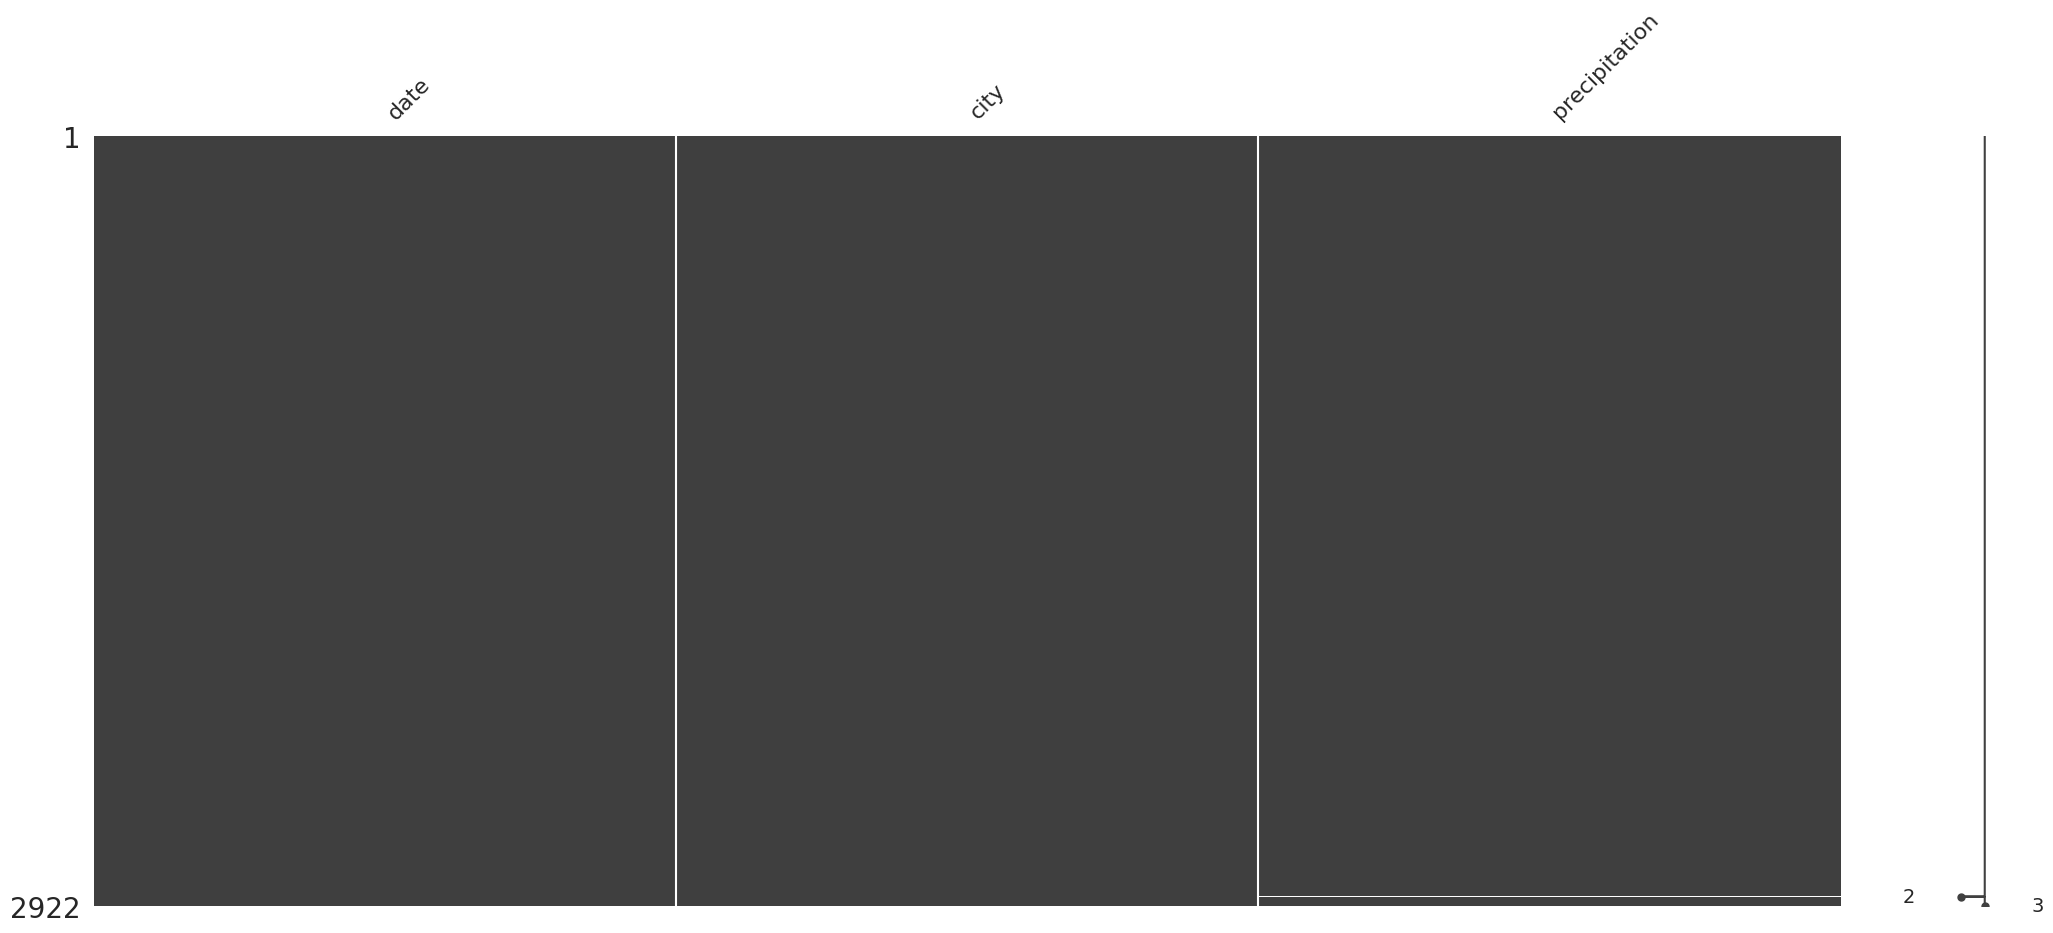

In [122]:
msno.matrix(df)

We found that there were none

##Export clean csv file##

In [124]:
df.to_csv('clean_seattle_nyc_weather.csv', index=False)

In [129]:
from google.colab import files
files.download("clean_seattle_nyc_weather.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>